<a href="https://colab.research.google.com/github/dewshishir/new-practice/blob/main/session_8_filtering_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Filtering

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
arr = [
    [1,1,1],
    [1,1,1],
    [1,1,1]
    ]
kernel = np.array(arr, dtype=np.float32)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [4]:
kernel = np.ones((3,3), np.float32)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
kernel = kernel/9
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [7]:
!wget https://raw.githubusercontent.com/dewshishir/new-practice/b515ebd5ca270dc0af6d7a0443a8c344ab890d24/orange.jpg -O orange.jpg

--2025-10-30 02:07:07--  https://raw.githubusercontent.com/dewshishir/new-practice/b515ebd5ca270dc0af6d7a0443a8c344ab890d24/orange.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5297 (5.2K) [image/jpeg]
Saving to: ‘orange.jpg’

orange.jpg          100%[===================>]   5.17K  --.-KB/s    in 0s      

2025-10-30 02:07:08 (62.8 MB/s) - ‘orange.jpg’ saved [5297/5297]



https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

-1 tells OpenCV to keep the same depth as the source image.

So if your input image (img) is an 8-bit color image (typical 0–255 pixels),
then your output (filtered_img) will also be 8-bit — not float or 16-bit.

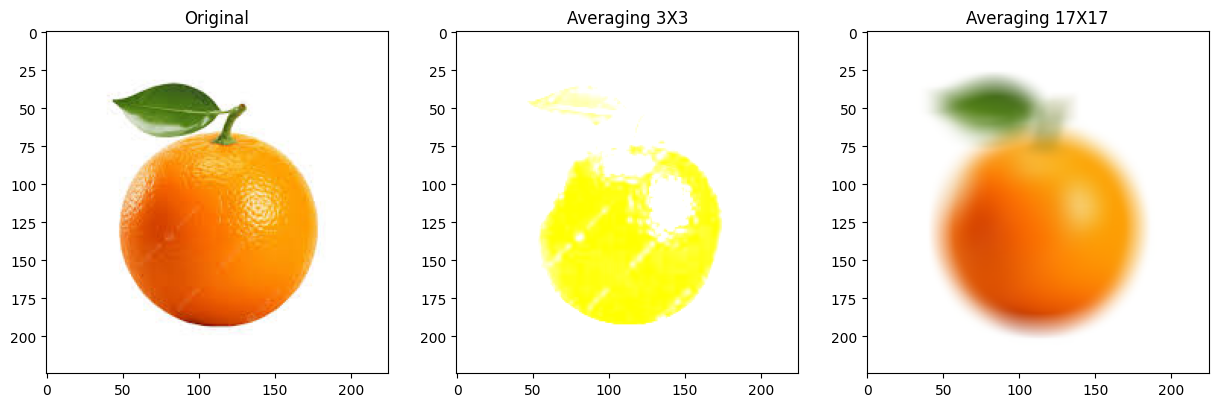

In [15]:
# using filter2d

img = cv2.imread('orange.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3),np.float32)
blur_img1 = cv2.filter2D(img,-1,kernel1) # when ddepth=-1, the output image will have the same depth as the source.

kernel2 = np.ones((17,17),np.float32)/289 #9 dara vag er ta dekho
blur_img17 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
# plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
# plt.axis('off')
plt.subplot(133),plt.imshow(blur_img17),plt.title('Averaging 17X17')
# plt.axis('off')
plt.show()

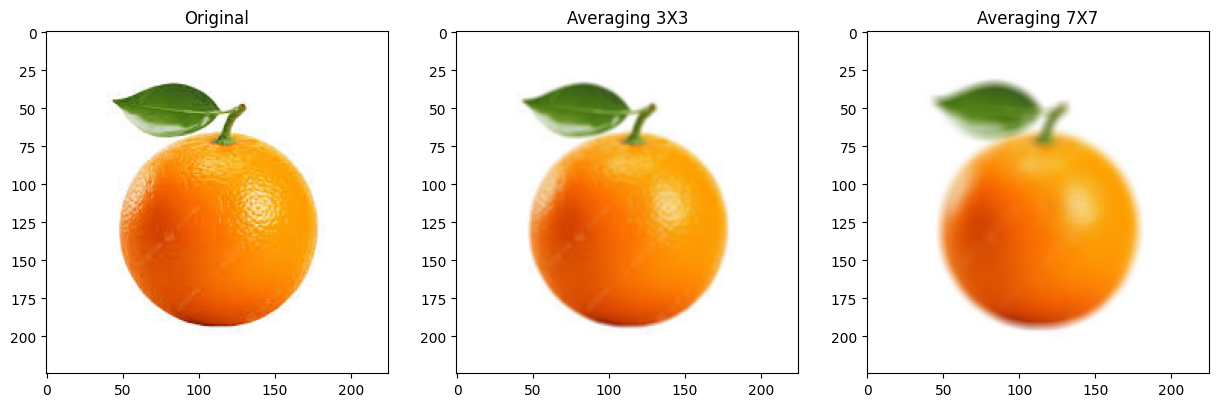

In [11]:
img = cv2.imread('orange.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3),np.float32) /9
blur_img1 = cv2.filter2D(img,-1,kernel1) # when ddepth=-1, the output image will have the same depth as the source.

kernel2 = np.ones((7,7),np.float32)/49
blur_img2 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
# plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
# plt.axis('off')
plt.subplot(133),plt.imshow(blur_img2),plt.title('Averaging 7X7')
# plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread('orange.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3),np.float32) /9
blur_img1 = cv2.filter2D(img,-1,kernel1) # when ddepth=-1, the output image will have the same depth as the source.

kernel2 = np.ones((7,7),np.float32)/49
blur_img2 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
# plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
# plt.axis('off')
plt.subplot(133),plt.imshow(blur_img2),plt.title('Averaging 7X7')
# plt.axis('off')
plt.show()

In [ ]:
img.shape

(563, 612, 3)

In [ ]:
blur_img2.shape

(563, 612, 3)

In [ ]:
kernel1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
np.min(blur_img1)

3

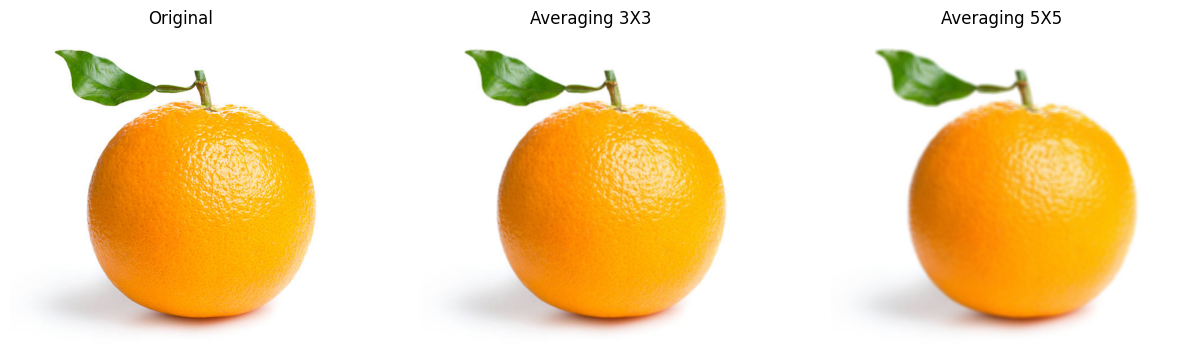

In [ ]:
# averaging using cv2.blur(img, (k,k))

assert img is not None, "file could not be read, check with os.path.exists()"

blur_img1 = cv2.blur(img, (3, 3))

blur_img2 = cv2.blur(img, (7, 7))

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
plt.axis('off')
plt.subplot(133),plt.imshow(blur_img2),plt.title('Averaging 5X5')
plt.axis('off')
plt.show()

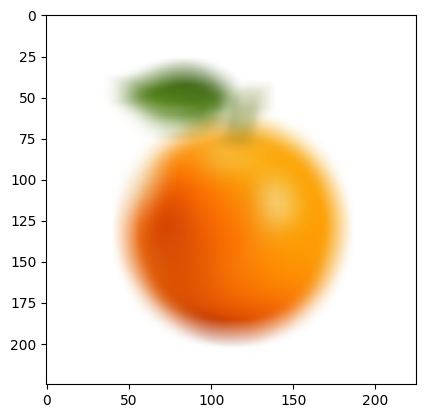

In [21]:
plt.imshow(blur_img17)

In [22]:
work= blur_img17

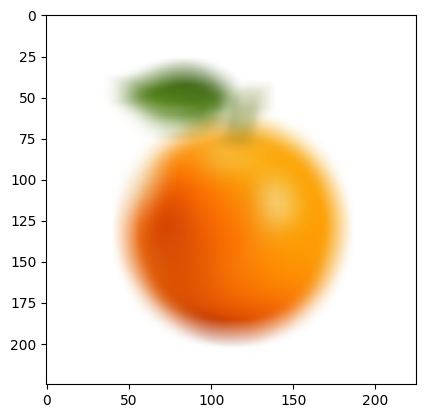

In [23]:
plt.imshow(work)

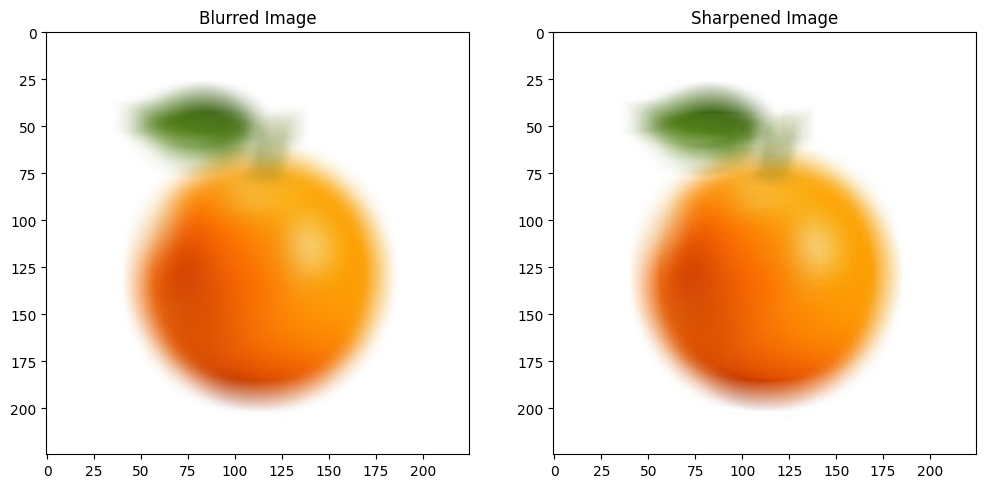

In [24]:
kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])

# Step 3: Apply filter2D for sharpening
sharpened = cv2.filter2D(work, -1, kernel_sharpen)

# Step 4: Show results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(work), plt.title("Blurred Image")
plt.subplot(1,2,2), plt.imshow(sharpened), plt.title("Sharpened Image")
plt.show()

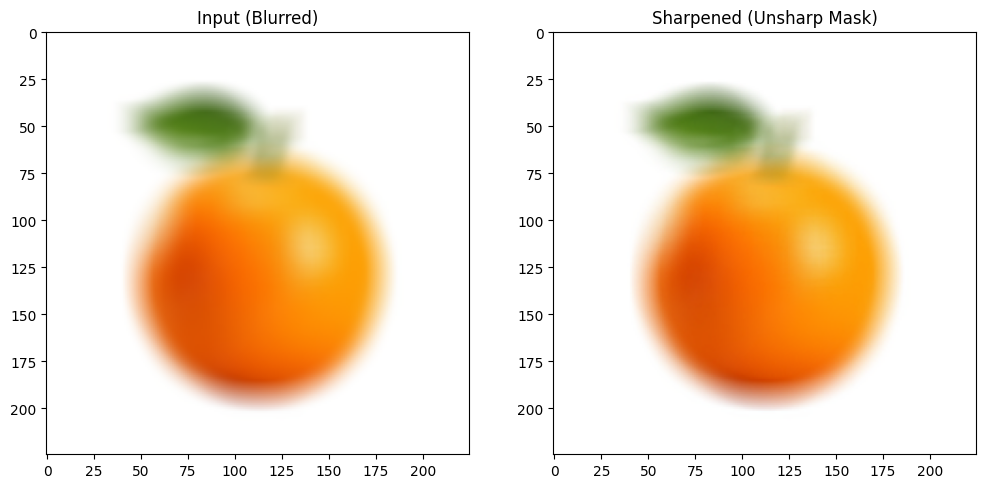

In [25]:
blur_kernel = np.ones((7,7), np.float32)/49
blurred = cv2.filter2D(work, -1, blur_kernel)

# Shortcut sharpening formula (Unsharp Mask)
sharpened = cv2.addWeighted(work, 1.5, blurred, -0.5, 0)
#     ↑        ↑        ↑        ↑
#   output   weight1   weight2   bias

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(work), plt.title("Input (Blurred)")
plt.subplot(1,2,2), plt.imshow(sharpened), plt.title("Sharpened (Unsharp Mask)")
plt.show()

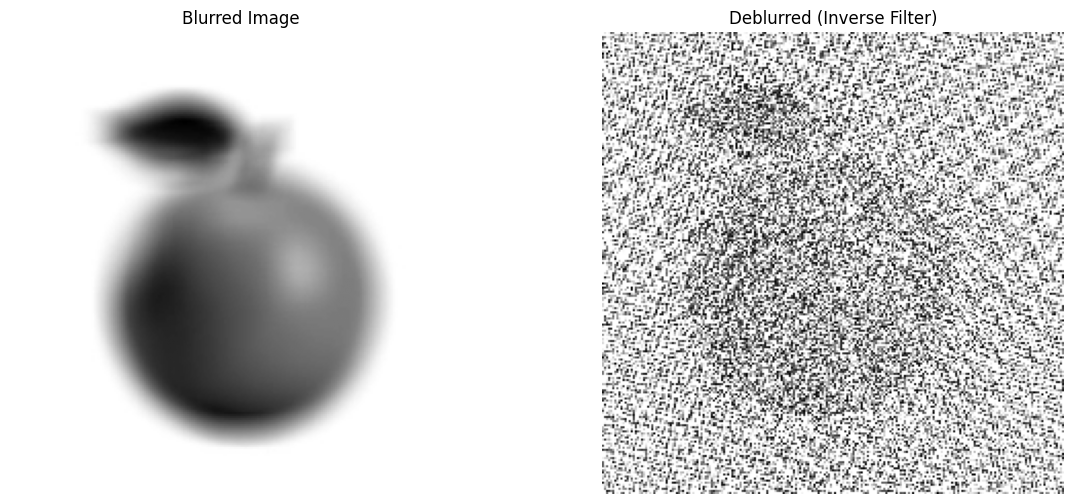

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read your blurred image
img = cv2.imread("blur_img17.jpg", cv2.IMREAD_GRAYSCALE)

# Step 2: Define the blur kernel (the same one that caused blur)
kernel = np.ones((17,17), np.float32) / 289  # 17x17 average blur

# Step 3: Deblur function (inverse filtering)
def deblur(img, kernel):
    kernel /= np.sum(kernel)
    img_fft = np.fft.fft2(img)
    kernel_fft = np.fft.fft2(kernel, s=img.shape)
    restored_fft = img_fft / (kernel_fft + 1e-3)   # add 1e-3 to avoid division overflow
    restored = np.abs(np.fft.ifft2(restored_fft))
    restored = np.uint8(np.clip(restored, 0, 255))
    return restored

# Step 4: Apply deblurring
restored_img = deblur(img, kernel)

# Step 5: Show results (side-by-side)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(restored_img, cmap='gray')
plt.title('Deblurred (Inverse Filter)')
plt.axis('off')

plt.show()


Image shape: (225, 225, 3)


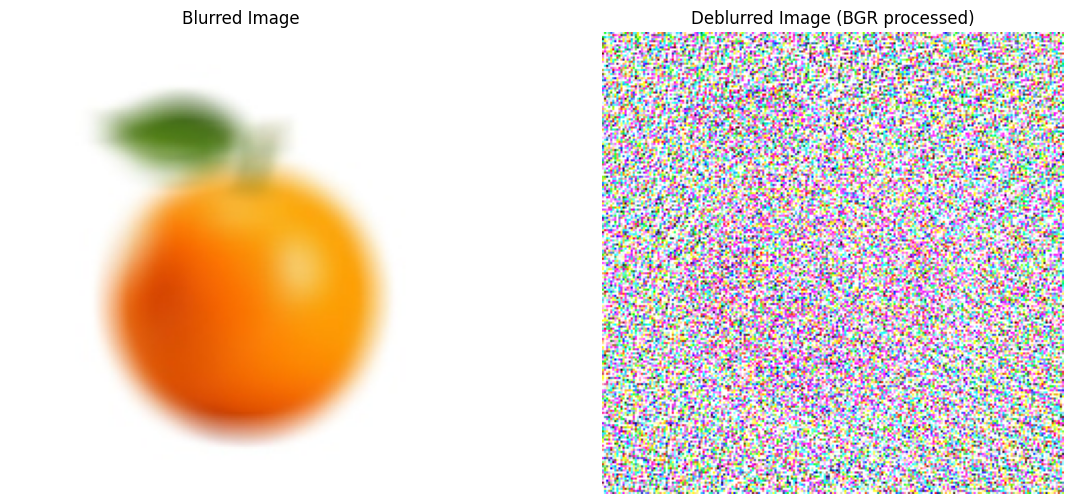

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the blurred color image (BGR)
img = cv2.imread("blur_img17.jpg")  # keep BGR format
print("Image shape:", img.shape)

# Step 2: Define blur kernel (same size you used before)
kernel = np.ones((17,17), np.float32) / 289

# Step 3: Define deblur function (for each color channel)
def deblur_color(img, kernel):
    restored_channels = []
    for c in cv2.split(img):  # Split into B, G, R channels
        kernel /= np.sum(kernel)
        img_fft = np.fft.fft2(c)
        kernel_fft = np.fft.fft2(kernel, s=c.shape)
        restored_fft = img_fft / (kernel_fft + 1e-3)  # avoid divide-by-zero
        restored = np.abs(np.fft.ifft2(restored_fft))
        restored = np.uint8(np.clip(restored, 0, 255))
        restored_channels.append(restored)
    return cv2.merge(restored_channels)  # merge back to BGR

# Step 4: Apply deblurring
restored_bgr = deblur_color(img, kernel)

# Step 5: Show result (OpenCV uses BGR, but Matplotlib uses RGB)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(restored_bgr, cv2.COLOR_BGR2RGB))
plt.title("Deblurred Image (BGR processed)")
plt.axis('off')
plt.show()
